In [14]:
#!pip install clustimage  

# Import library
from clustimage import Clustimage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Init with default settings
cl = Clustimage(method='pca', embedding='umap')
#cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8), 'cells_per_block':(1,1)})

[clustimage] >INFO> filepath is set to [/var/folders/4n/tt9dt5sj1bg79bz276h0m3lr0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/4n/tt9dt5sj1bg79bz276h0m3lr0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/4n/tt9dt5sj1bg79bz276h0m3lr0000gn/T/clustimage]


In [16]:
X = cl.import_data("thumbnails")

[clustimage] >INFO> Extracting images from: [thumbnails]
[clustimage] >INFO> [2011] files are collected recursively from path: [thumbnails]
[clustimage] >INFO> [2011] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|██████████| 2011/2011 [00:06<00:00, 317.11it/s]


In [25]:
# Cluster images
results = cl.fit_transform(X["pathnames"])

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|██████████| 2011/2011 [00:08<00:00, 234.29it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=2011, features=390
[clustimage] >INFO> Compute [umap] embedding
[clustimage] >INFO> Due to a "numba" error, UMAP is temporarily disabled.
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 22/22 [00:01<00:00, 14.11it/s]
[clustimage] >INFO> Compute dendrogram threshold.
[clustimage] >INFO> Optimal number clusters detected: [3].
[clustimage] >INFO> Fin.
[clustimage] >INFO> Updating cluster-labels an

In [47]:
# load items dataset

data = pd.read_csv("items.csv")

In [48]:
data[data['title'] == "Michael Jackson - Thriller - Cd"]

,title,price,currency_id,thumbnail_id
610,Michael Jackson - Thriller - Cd,60000.0,COP,D_610510-MCO73223374560_122023-I


In [50]:
# find the index of the pathname D_610510-MCO73223374560_122023-I in X pathnames array

np.where(X["pathnames"] == "thumbnails/D_610510-MCO73223374560_122023-I.jpg")

(array([683]),)

In [64]:
cl.results['feat']

array([[ 1.21414277e+04,  4.38414603e+03, -1.52713130e+03, ...,
         1.63320570e+02,  3.98676935e+01, -7.81138081e+01],
       [-1.05984600e+04, -3.55501670e+03, -8.69897613e+02, ...,
         1.28123174e+02,  9.99734340e+01, -9.28854942e+01],
       [-6.89186507e+03,  2.02351165e+03, -1.10475195e+03, ...,
         3.66024036e+02, -3.67688287e+02, -2.93620392e+01],
       ...,
       [ 1.10999442e+04,  2.44062293e+03, -1.96139422e+03, ...,
         2.36397173e+01,  7.31557379e+01,  1.13974633e+02],
       [-9.17267280e+03, -6.94167706e+03, -1.04496189e+03, ...,
         4.32628785e+01, -8.79057434e+01,  9.67677809e+01],
       [-8.64015283e+03, -1.17616276e+03,  3.79131186e+03, ...,
        -1.14065816e+02,  1.55678221e+00, -1.87026081e+02]])

In [81]:
# turn the results into a dataframe and assign the pathnames to the index

df = pd.DataFrame(cl.results['feat'], index=X["pathnames"])

In [83]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
thumbnails/D_620241-MLA46683554810_072021-I.jpg,12141.427673,4384.146029,-1527.131300,-2545.784217,-7235.569530,995.236310,24.645105,2996.865653,987.194940,-2478.017983,...,128.551829,-35.954222,-216.727941,278.013650,-123.298853,-216.810634,0.343171,163.320570,39.867693,-78.113808
thumbnails/D_662334-MLA47889744943_102021-I.jpg,-10598.459998,-3555.016701,-869.897613,-6096.750540,-1798.122359,-2740.250233,1246.217804,618.808236,-400.870249,-2062.374535,...,138.507065,-348.340875,184.516134,121.218190,-20.606891,-227.747225,6.280745,128.123174,99.973434,-92.885494
thumbnails/D_946666-MLU73800839867_012024-I.jpg,-6891.865071,2023.511649,-1104.751947,6489.812492,2219.893498,3089.094542,-2892.498283,513.952656,-109.794478,700.620921,...,-81.178237,-252.621130,144.581777,-226.264941,-632.693936,78.497082,266.126800,366.024036,-367.688287,-29.362039
thumbnails/D_696649-MCO71369788490_082023-I.jpg,-4292.389287,-6745.065509,-578.930650,3183.124319,-293.466791,-168.563620,-318.206052,1708.978732,1021.901612,-671.071048,...,53.333315,208.844469,-46.810406,57.394919,-55.508062,-35.787015,-97.270696,119.796074,-8.036027,-66.842544
thumbnails/D_791148-MLU69264747760_052023-I.jpg,9159.050592,3964.735168,-3598.893325,3626.228037,6599.132085,540.591923,1365.782086,-1216.410512,18.465539,1682.194753,...,219.156858,-285.303685,100.241973,181.705512,228.060361,-5.986120,183.172956,-210.480721,-23.337238,-56.425706


In [85]:
# calculate the distance matrix with scikit learn and create a function to retreieve the top n similar items to a given item

from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(df, df)

# turn the distance matrix into a dataframe with the index and columns as the pathnames

dist_df = pd.DataFrame(dist, index=X["pathnames"], columns=X["pathnames"])

In [86]:
dist_df

,thumbnails/D_620241-MLA46683554810_072021-I.jpg,thumbnails/D_662334-MLA47889744943_102021-I.jpg,thumbnails/D_946666-MLU73800839867_012024-I.jpg,thumbnails/D_696649-MCO71369788490_082023-I.jpg,thumbnails/D_791148-MLU69264747760_052023-I.jpg,thumbnails/D_774813-MLU54958287911_042023-I.jpg,thumbnails/D_752802-MLU73885792097_012024-I.jpg,thumbnails/D_916906-MLU69760338229_062023-I.jpg,thumbnails/D_782215-MLA25196766058_112016-I.jpg,thumbnails/D_900370-MLU72998606380_112023-I.jpg,...,thumbnails/D_902581-MLA51605407191_092022-I.jpg,thumbnails/D_953172-MLU73326061876_122023-I.jpg,thumbnails/D_894362-MCO53567005259_022023-I.jpg,thumbnails/D_999397-MLU54977300707_042023-I.jpg,thumbnails/D_621814-MLU54963140170_042023-I.jpg,thumbnails/D_655169-MLU54957829927_042023-I.jpg,thumbnails/D_758010-MLU69642148933_052023-I.jpg,thumbnails/D_893529-MLU69233688313_052023-I.jpg,thumbnails/D_997173-MLU69155369677_042023-I.jpg,thumbnails/D_882464-MCO72923875067_112023-I.jpg
thumbnails/D_620241-MLA46683554810_072021-I.jpg,0.000000,28019.106287,26198.060147,23709.669674,19949.183633,26403.820612,36585.074611,28365.501827,29214.652665,31654.025770,...,13940.079485,19126.565727,19610.744658,16953.053668,25328.574047,30755.356662,14757.093839,16460.723886,30955.448218,25291.070254
thumbnails/D_662334-MLA47889744943_102021-I.jpg,28019.106287,0.000000,21405.610954,17288.596277,28803.415909,21404.956529,22756.222715,23158.238192,22639.028284,24343.289889,...,28586.604723,30435.626197,24248.565469,34979.886984,29061.956323,23546.033530,28750.324090,27819.789535,18089.623117,16279.198680
thumbnails/D_946666-MLU73800839867_012024-I.jpg,26198.060147,21405.610954,0.000423,15359.886259,21974.247062,21235.900493,21469.718104,22056.302777,17193.299963,16260.006676,...,27633.251322,23673.690055,22364.346702,31074.055413,28312.585731,20176.171556,25631.170976,25480.217425,23631.384748,15043.995805
thumbnails/D_696649-MCO71369788490_082023-I.jpg,23709.669674,17288.596277,15359.886259,0.000173,21768.812603,21914.029471,25006.110053,21001.885589,20652.812313,19111.582033,...,24455.989093,24757.630174,18672.761071,28686.605923,21950.899262,23369.288758,22628.151146,23267.505587,19105.435426,11731.232667
thumbnails/D_791148-MLU69264747760_052023-I.jpg,19949.183633,28803.415909,21974.247062,21768.812603,0.000345,30297.209133,34337.012828,26271.303765,26174.574391,26867.902784,...,18456.220130,19377.674986,21985.892802,17988.991141,24398.475784,29679.849348,14128.184272,18187.592207,28431.281203,23987.530005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thumbnails/D_655169-MLU54957829927_042023-I.jpg,30755.356662,23546.033530,20176.171556,23369.288758,29679.849348,20316.104541,17254.312816,27350.970008,16533.522870,21383.013782,...,32407.161657,28845.758563,30362.680075,37853.456367,34931.527262,0.000000,32325.977006,32611.695054,26619.853270,19816.470209
thumbnails/D_758010-MLU69642148933_052023-I.jpg,14757.093839,28750.324090,25631.170976,22628.151146,14128.184272,29430.903145,36950.361964,27694.140569,30112.891991,30695.514663,...,15121.982478,20145.947862,19796.769229,13987.609128,23317.083039,32325.977006,0.000488,17128.594029,28723.315058,25222.611235
thumbnails/D_893529-MLU69233688313_052023-I.jpg,16460.723886,27819.789535,25480.217425,23267.505587,18187.592207,29409.125318,36399.225623,27874.197242,29637.079364,30313.062595,...,15392.049055,21465.789182,20846.039493,17249.559146,25675.063211,32611.695054,17128.594029,0.000000,29425.393923,25269.192470
thumbnails/D_997173-MLU69155369677_042023-I.jpg,30955.448218,18089.623117,23631.384748,19105.435426,28431.281203,26167.798541,26069.005650,25638.833390,26577.764065,25786.191461,...,29551.721341,31151.987698,24521.932772,34110.755894,25307.597406,26619.853270,28723.315058,29425.393923,0.000000,17743.031658


In [95]:
# function to retrieve the top n similar items to a given item

def get_similar_items(item, n):
    return list(dist_df[item].sort_values().head(n).index)

get_similar_items("thumbnails/D_610510-MCO73223374560_122023-I.jpg", 5)

['thumbnails/D_610510-MCO73223374560_122023-I.jpg',
 'thumbnails/D_905888-MCO73130231690_122023-I.jpg',
 'thumbnails/D_723421-MCO72182543001_102023-I.jpg',
 'thumbnails/D_671874-MCO69639410494_052023-I.jpg',
 'thumbnails/D_894615-MLU73872534646_012024-I.jpg']

In [96]:
# plot the given item and the top n similar items using matplotlib

def plot_similar_items(item, n):
    fig, axes = plt.subplots(1, n+1, figsize=(20, 10))
    axes[0].imshow(plt.imread(item))
    axes[0].axis('off')
    axes[0].set_title("Original")
    for i, similar_item in enumerate(get_similar_items(item, n)):
        axes[i+1].imshow(plt.imread(similar_item))
        axes[i+1].axis('off')
        axes[i+1].set_title(f"Similar {i+1}")
    plt.show()

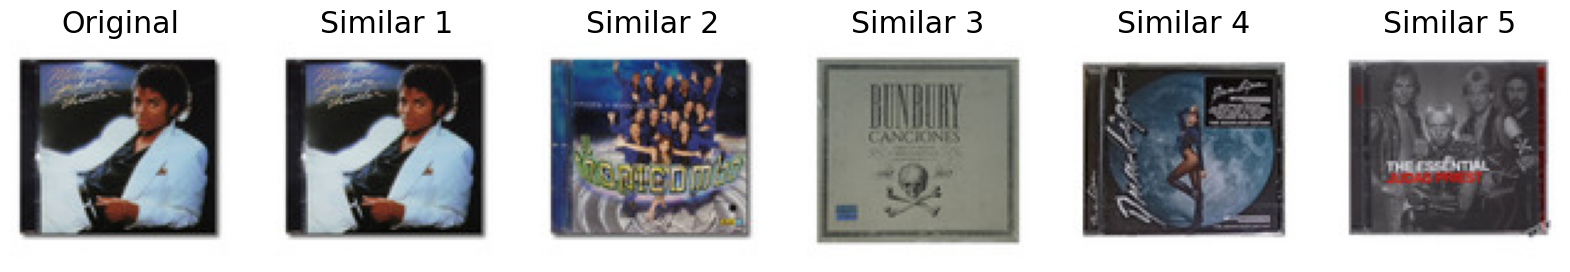

In [97]:
plot_similar_items("thumbnails/D_610510-MCO73223374560_122023-I.jpg", 5)